In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('Receitas_base.csv')

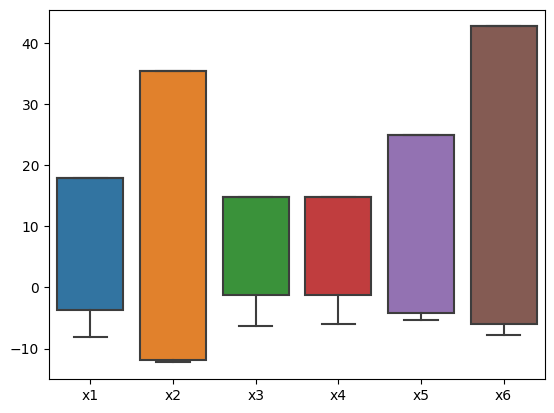

In [35]:
sns.boxplot(data)
def reindex_df(df, weight_col):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

In [45]:
wc1 = 0.7952167414050823 
wc2 = 0.09715994020926756
wc3 = 0.10762331838565023

ws = 0.20478325859491778
wns = 0.7952167414050823


In [46]:
contrato_smoker = pd.concat([pd.concat([pd.Series(data.x2.values, name='contrato_smoker'), pd.Series(np.ones(data.shape[0])*wns, name='weight')], axis=1),
                            pd.concat([pd.Series(data.x3.values, name='contrato_smoker'), pd.Series(np.ones(data.shape[0])*ws, name='weight')], axis=1)], axis=0) 



In [348]:
contrato_cluster = pd.concat([pd.concat([pd.Series(data.x4.values, name='contrato_cluster'), pd.Series(np.ones(data.shape[0])*wc1, name='weight')], axis=1),
                               pd.concat([pd.Series(data.x5.values, name='contrato_cluster'), pd.Series(np.ones(data.shape[0])*wc2, name='weight')], axis=1),
                               pd.concat([pd.Series(data.x6.values, name='contrato_cluster'), pd.Series(np.ones(data.shape[0])*wc3, name='weight')], axis=1)], axis=0) 



In [352]:
contrato_cluster.weight.value_counts()

0.795217    3000
0.097160    3000
0.107623    3000
Name: weight, dtype: int64

<AxesSubplot: >

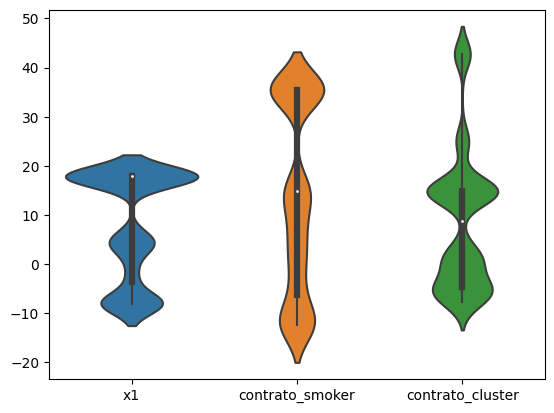

In [381]:
c2_sampled = contrato_smoker.sample(n=3000, weights=contrato_smoker.weight).contrato_smoker
c3_sampled = contrato_cluster.sample(n=3000, weights=contrato_cluster.weight).contrato_cluster

master = pd.concat([data.x1, c2_sampled.reset_index(), c3_sampled.reset_index()], axis=1)
sns.violinplot(master[['x1','contrato_smoker', 'contrato_cluster']])

In [394]:
print('Unique contract total profits :', data.x1.sum())
print('Dual contract total profits :', c2_sampled.sum())
print('Contract per cluster total profits :', c3_sampled.sum())

Unique contract total profits : 24077.05744688507
Dual contract total profits : 39353.63414405551
Contract per cluster total profits : 26364.198350363025


In [396]:
((contrato_smoker.contrato_smoker)*(contrato_smoker.weight)).sum()

41628.250137017036

In [395]:
((contrato_cluster.contrato_cluster)*(contrato_cluster.weight)).sum()

24707.631767835483